In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Cargar data

In [18]:
data = np.load('data/proyecto_training_data.npy')

In [19]:
data[1]

array([1.815e+05, 6.000e+00, 1.262e+03, 6.000e+00, 1.976e+03, 8.000e+01])

## Separar data
Separar datos en un set de entrenamiento y un set para validación y pruebas.

In [20]:
entrenamiento_len = int(len(data) * 0.8)

In [21]:
sel = np.random.choice(data.shape[0], size=entrenamiento_len, replace=False)

In [22]:
entrenamiento = pd.DataFrame(data[sel], columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [23]:
unsel = list(set(range(data.shape[0])) - set(sel))

In [24]:
validacion = pd.DataFrame(data[unsel], columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

## Análisis exploratorio

Estadísticas descriptivas

In [25]:
entrenamiento.describe(include='all')

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,965.000000
mean,179769.070205,6.073630,1159.534247,6.499144,1970.916096,70.010363
std,79579.428500,1.392743,390.764801,1.625103,30.324746,24.416763
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129000.000000,5.000000,876.000000,5.000000,1953.000000,60.000000
50%,160000.000000,6.000000,1080.000000,6.000000,1972.000000,69.000000
75%,212000.000000,7.000000,1389.750000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


Rango peak-to-peak

In [34]:
entrenamiento.max() - entrenamiento.min()

SalePrice       720100.0
OverallQual          9.0
1stFlrSF          4358.0
TotRmsAbvGrd        10.0
YearBuilt          137.0
LotFrontage        292.0
dtype: float64

Histogramas

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

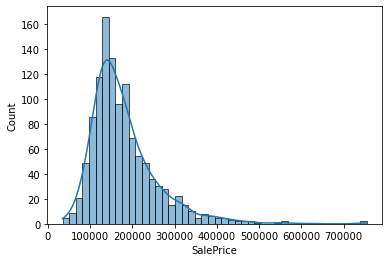

In [26]:
sns.histplot(data=entrenamiento, x="SalePrice", kde=True)

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

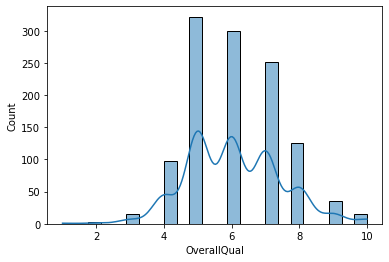

In [27]:
sns.histplot(data=entrenamiento, x="OverallQual", kde=True)

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

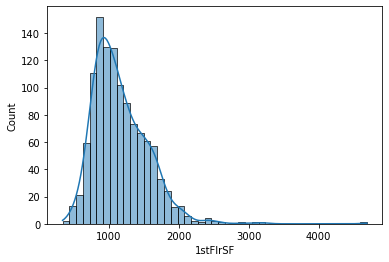

In [28]:
sns.histplot(data=entrenamiento, x="1stFlrSF", kde=True)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

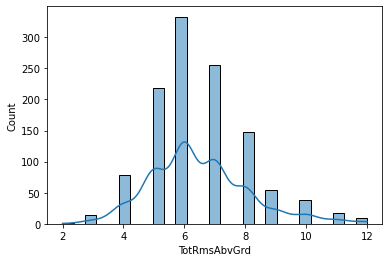

In [29]:
sns.histplot(data=entrenamiento, x="TotRmsAbvGrd", kde=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

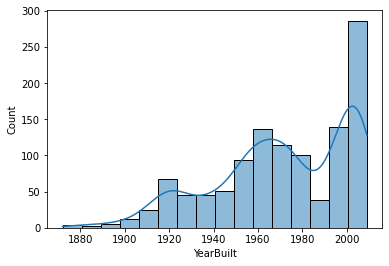

In [30]:
sns.histplot(data=entrenamiento, x="YearBuilt", kde=True)

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

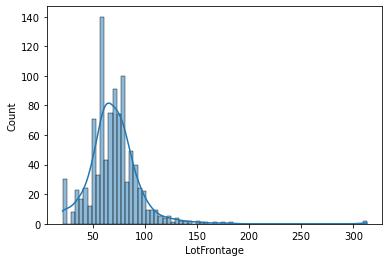

In [31]:
sns.histplot(data=entrenamiento, x="LotFrontage", kde=True)

Coeficientes de correlación

In [62]:
coeficientes_corr = entrenamiento.corr( ).iloc[0:1, 1:]
coeficientes_corr

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,0.794764,0.609508,0.547711,0.527241,0.338091


Scatterplots

In [67]:
#coeficientes_corr.OverallQual
round(float(coeficientes_corr['OverallQual']), 3)
# make a function?

0.795

Text(0.5, 1.0, 'Overall Quality corr = 0.795')

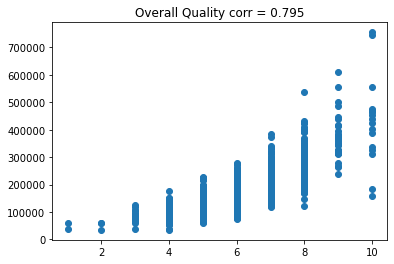

In [73]:
OverallQual_corr = round(float(coeficientes_corr['OverallQual']), 3)
plt.scatter(x = entrenamiento['OverallQual'], y = entrenamiento['SalePrice'])
plt.title('Overall Quality corr = {corr}'.format(corr = OverallQual_corr))

Text(0.5, 1.0, 'First Floor Square Feet corr = 0.61')

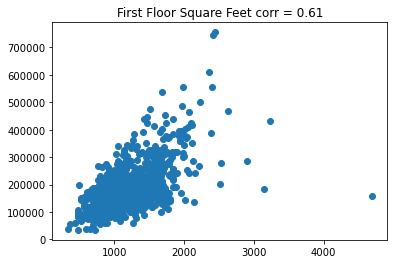

In [72]:
FirtFlr_corr = round(float(coeficientes_corr['1stFlrSF']), 3)
plt.scatter(x = entrenamiento['1stFlrSF'], y = entrenamiento['SalePrice'])
plt.title('First Floor Square Feet corr = {corr}'.format(corr = FirtFlr_corr))

Text(0.5, 1.0, 'Total Rooms Above Grade corr = 0.548')

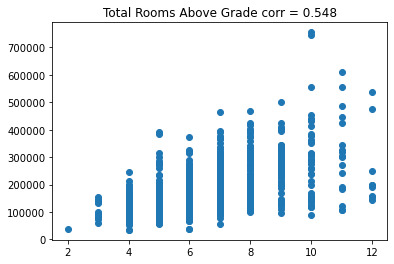

In [76]:
TotRms_corr = round(float(coeficientes_corr['TotRmsAbvGrd']), 3)
plt.scatter(x = entrenamiento['TotRmsAbvGrd'], y = entrenamiento['SalePrice'])
plt.title('Total Rooms Above Grade corr = {corr}'.format(corr = TotRms_corr))

Text(0.5, 1.0, 'Total Rooms Above Grade corr = 0.527')

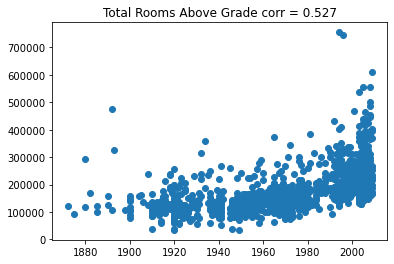

In [77]:
YearBuilt_corr = round(float(coeficientes_corr['YearBuilt']), 3)
plt.scatter(x = entrenamiento['YearBuilt'], y = entrenamiento['SalePrice'])
plt.title('Total Rooms Above Grade corr = {corr}'.format(corr = YearBuilt_corr))

Text(0.5, 1.0, 'Linear feet of street connected to property corr = 0.338')

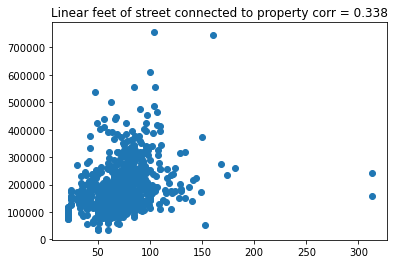

In [78]:
Lot_corr = round(float(coeficientes_corr['LotFrontage']), 3)
plt.scatter(x = entrenamiento['LotFrontage'], y = entrenamiento['SalePrice'])
plt.title('Linear feet of street connected to property corr = {corr}'.format(corr = Lot_corr))